In [1]:
import numpy as np
import pandas as pd

# For data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# For neural network
import keras
from keras.models import Sequential
from keras.layers import Dense

# For testing
from sklearn.metrics import accuracy_score

# To visualize the training process
import matplotlib.pyplot as plt

In [2]:
# Data is imported, downloaded from https://www.kaggle.com/iabhishekofficial/mobile-price-classification
data = pd.read_csv('train.csv')
#data.head(10)

In [3]:
# Changing data into array.
features = data.iloc[:,:20].values
price_range = data.iloc[:,20:21].values

In [4]:
# Normalization
sc = StandardScaler()
features = sc.fit_transform(features)

In [5]:
# One hot encoding
ohe = OneHotEncoder()
price_range = ohe.fit_transform(price_range).toarray()

In [6]:
# Splitting data into test and train. 90% test, 10% train
features_train, features_test, price_range_train, price_range_test = train_test_split(features, price_range,test_size = 0.1)

In [7]:
# Model is created
model = Sequential()
model.add(Dense(16, input_dim=20, activation= 'relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [8]:
# The loss function
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Training
history = model.fit(features_train, price_range_train, validation_data = (features_test, price_range_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 14ms/step - loss: 1.5611 - accuracy: 0.2167 - val_loss: 1.4974 - val_accuracy: 0.2000
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 1.4471 - accuracy: 0.2428 - val_loss: 1.4240 - val_accuracy: 0.2500
Epoch 3/100
29/29 [==============================] - 0s 6ms/step - loss: 1.3963 - accuracy: 0.2733 - val_loss: 1.3772 - val_accuracy: 0.2700
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 1.3622 - accuracy: 0.3072 - val_loss: 1.3409 - val_accuracy: 0.3250
Epoch 5/100
29/29 [==============================] - 0s 7ms/step - loss: 1.3298 - accuracy: 0.3433 - val_loss: 1.3009 - val_accuracy: 0.3750
Epoch 6/100
29/29 [==============================] - 0s 5ms/step - loss: 1.2934 - accuracy: 0.3717 - val_loss: 1.2542 - val_accuracy: 0.4050
Epoch 7/100
29/29 [==============================] - 0s 7ms/step - loss: 1.2465 - accuracy: 0.4300 - val_loss: 1.1964 - val_accuracy: 0.5000
Epoch 8/100


Epoch 59/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0913 - accuracy: 0.9789 - val_loss: 0.1419 - val_accuracy: 0.9450
Epoch 60/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0902 - accuracy: 0.9800 - val_loss: 0.1401 - val_accuracy: 0.9500
Epoch 61/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0887 - accuracy: 0.9806 - val_loss: 0.1396 - val_accuracy: 0.9400
Epoch 62/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0866 - accuracy: 0.9817 - val_loss: 0.1396 - val_accuracy: 0.9550
Epoch 63/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0844 - accuracy: 0.9817 - val_loss: 0.1349 - val_accuracy: 0.9600
Epoch 64/100
29/29 [==============================] - 0s 4ms/step - loss: 0.0821 - accuracy: 0.9828 - val_loss: 0.1326 - val_accuracy: 0.9600
Epoch 65/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0802 - accuracy: 0.9822 - val_loss: 0.1312 - val_accuracy: 0.9600
Epoch 

In [10]:
# Checking performance of model on test data
price_range_prediction = model.predict(features_test)
prediction = list()

for i in range(len(price_range_prediction)):
    prediction.append(np.argmax(price_range_prediction[i]))

    test = list()
for i in range(len(price_range_test)):
    test.append(np.argmax(price_range_test[i]))

In [11]:
a = accuracy_score(prediction,test)
print('Accuracy is:', a*100)

Accuracy is: 95.0


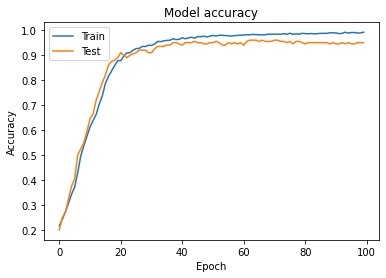

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()